<a href="https://colab.research.google.com/github/nxxk23/PROJECT/blob/main/FileLab.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd
hemo = pd.read_csv('/content/drive/MyDrive/ckdresearch2023/Hemodialysis.csv', encoding='latin1')

In [3]:
lab = pd.read_csv('/content/drive/MyDrive/ckdresearch2023/Lab.csv')

In [4]:
# Create a list from hemo['PatientUID']
patient_uid_list = hemo['PatientUID'].unique().tolist()
# Remove patient UIDs from lab['PatientUID'] that are not in the list
lab = lab[~lab['PatientUID'].isin(patient_uid_list)]
lab.shape

(17728574, 11)

In [5]:
lab0 = pd.DataFrame(lab)

In [6]:
lab_location = lab['Location'].value_counts().reset_index()
lab_location.columns = ['Location', 'Location_Count']

lab_result = lab['ResultItemName'].value_counts().reset_index()
lab_result.columns = ['ResultItemName', 'ResultItemName_Count']

lab_request = lab['RequestItemName'].value_counts().reset_index()
lab_request.columns = ['RequestItemName', 'RequestItemName_Count']

columns_to_count = ['Location', 'ResultItemName', 'RequestItemName']

# Count unique values in the specified columns
lab_count = lab[columns_to_count].value_counts().reset_index()
lab_count.columns = ['Location', 'ResultItemName', 'RequestItemName', 'Count']

lab_df = pd.DataFrame(lab_count)

In [7]:
LabSummaryDF = pd.DataFrame(lab_df)

# **Slope**


> **ค่า x = ค่าจากวิสิท t ที่มาก่อน**




In [8]:
import pandas as pd
slope = pd.read_excel('/content/drive/MyDrive/ckdresearch2023/Assign/SummaryFile/Slope.xlsx')

In [9]:
data = pd.DataFrame(slope)
data = data[['PatientUID','PatientVisitUID','Slopes']]
data = data.dropna(subset='Slopes')

In [10]:
df = pd.DataFrame(data)

# Sort the DataFrame by PatientUID and PatientVisitUID
df = df.sort_values(by=['PatientUID', 'PatientVisitUID'])

# Create a new column to store the previous slope value
df['PreviousSlope'] = df['Slopes'].shift(1)

# Update the Slopes column with the PreviousSlope values
df['Slopes'] = df['PreviousSlope']

# Drop the PreviousSlope column
df = df.drop(columns=['PreviousSlope'])
data = df.dropna()

# **LabList**


> **Replace Item with List then create new table to store the value**




In [11]:
lab = pd.DataFrame(lab0) ##run from this cell if u want to rerun

In [12]:
lab0.columns

Index(['LabNo', 'PatientUID', 'PatientVisitUID', 'Location', 'RequestItemName',
       'ResultItemName', 'CWhen', 'ResultDttm', 'ResultValue', 'Unit',
       'ReferenceRange'],
      dtype='object')

In [13]:
# Define the mapping of LabSummaryDF indices to lab result DataFrames
lab_mapping = {
    'lab1': [1, 1587],
    'lab2': [3, 129, 185, 312],
    'lab3': [0, 103],
    'lab4': [5, 115],
    'lab5': [2, 112],
    'lab6': [6, 118],
    'lab7': [4, 117],
    'lab8': [63, 194],
    'lab9': [31, 172],
    'lab10': [33, 175],
    'lab11': [21, 137],
    'lab12': [22, 3001],
    'lab13': [8, 100, 1736, 2577, 2856, 2980],
    'lab14': [13],
    'lab15': [15],
    'lab16': [159],
    'lab17': [198, 238, 584],
    'lab18': [154],
    'lab19': [30, 156, 177, 223, 277, 561],
    'lab20': [49, 153],
    'lab21': [23, 114],
    'lab22': [50, 130],
    'lab23': [34, 126],
    'lab24': [51, 131],
    'lab25': [220, 304, 539, 2909],
    'lab26': [191, 253],
    'lab27': [163],
    'lab28': [108,397,73,305],
    'lab29': [176, 2796],
    'lab30': [218, 949],
    'lab31': [233, 1424],
    'lab32': [182, 473]
    # ... add more mappings as needed
}

In [14]:
# Create new columns for labels
lab['LabelResult'] = ""
lab['LabelRequest'] = ""

# Iterate through the prescription_mapping dictionary and update 'LabelResult' and 'LabelRequest' columns
for lab_name, indices in lab_mapping.items():
    result_item_names = LabSummaryDF[LabSummaryDF.index.isin(indices)]['ResultItemName'].tolist()
    request_item_names = LabSummaryDF[LabSummaryDF.index.isin(indices)]['RequestItemName'].tolist()
    lab.loc[lab['ResultItemName'].isin(result_item_names), 'LabelResult'] = lab_name
    lab.loc[lab['RequestItemName'].isin(request_item_names), 'LabelRequest'] = lab_name

In [15]:
lab = lab[['LabNo','PatientUID', 'PatientVisitUID','CWhen','ResultItemName','RequestItemName','ResultValue', 'LabelResult', 'LabelRequest']]

## **Define**

**กรณีคล้าย FileMedical**

```
มันจะมี rows ที่ mapping value ไม่ตรงกัน เช่น
```
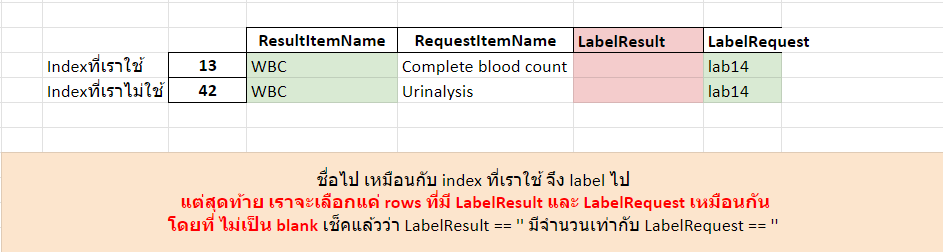


#### **Re-Check Mapping**

In [16]:
lab0.loc[(lab0['LabelResult'] == 'lab1') & (lab0['LabelRequest'] == 'lab3'), 'LabelRequest'] = 'lab1' #L1:eGFR
lab0.loc[(lab0['LabelResult'] == 'lab12') & (lab0['LabelRequest'] == 'lab15'), 'LabelRequest'] = 'lab12' #L12:Hemoglobin
lab0.loc[(lab0['LabelResult'] == 'lab13') & (lab0['LabelRequest'] == 'lab15'), 'LabelRequest'] = 'lab13' #L13:HCT
lab0.loc[(lab0['LabelResult'] == 'lab14') & (lab0['LabelRequest'] == 'lab15'), 'LabelRequest'] = 'lab14' #L14:WBC

In [17]:
#lab0.loc[(lab0['LabelResult'] == 'lab1') & (lab0['LabelRequest'] != 'lab1')] remap >> 435224
#lab0.loc[(lab0['LabelResult'] == 'lab2') & (lab0['LabelRequest'] != 'lab2')] checked >> 412742
#lab0.loc[(lab0['LabelResult'] == 'lab3') & (lab0['LabelRequest'] != 'lab3')] checked >> 492979
#lab0.loc[(lab0['LabelResult'] == 'lab4') & (lab0['LabelRequest'] != 'lab4')] checked >> 405920
#lab0.loc[(lab0['LabelResult'] == 'lab5') & (lab0['LabelRequest'] != 'lab5')] checked >> 419305
#lab0.loc[(lab0['LabelResult'] == 'lab6') & (lab0['LabelRequest'] != 'lab6')] checked >> 405185
#lab0.loc[(lab0['LabelResult'] == 'lab7') & (lab0['LabelRequest'] != 'lab7')] checked >> 406077
#lab0.loc[(lab0['LabelResult'] == 'lab8') & (lab0['LabelRequest'] != 'lab8')] checked >> 89115
#lab0.loc[(lab0['LabelResult'] == 'lab9') & (lab0['LabelRequest'] != 'lab9')] checked >> 179602
#lab0.loc[(lab0['LabelResult'] == 'lab10') & (lab0['LabelRequest'] != 'lab10')] checked >> 178485
#lab0.loc[(lab0['LabelResult'] == 'lab11') & (lab0['LabelRequest'] != 'lab11')] checked >> 267516
#lab0.loc[(lab0['LabelResult'] == 'lab12') & (lab0['LabelRequest'] != 'lab12')] remap >> Hb 248268
#lab0.loc[(lab0['LabelResult'] == 'lab13') & (lab0['LabelRequest'] != 'lab13')] remap >> HCT 348514 rows
#lab14 >> 315233
#lab0.loc[(lab0['LabelResult'] == 'lab15') & (lab0['LabelRequest'] != 'lab15')] checked >> 315226 rows
#lab0.loc[(lab0['LabelResult'] == 'lab16') & (lab0['LabelRequest'] != 'lab16')] checked >> 10055 rows
#lab0.loc[(lab0['LabelResult'] == 'lab17') & (lab0['LabelRequest'] != 'lab17')] checked >> 8860 rows
#lab0.loc[(lab0['LabelResult'] == 'lab18') & (lab0['LabelRequest'] != 'lab18')] checked >> 10974 rows
#lab0.loc[(lab0['LabelResult'] == 'lab19') & (lab0['LabelRequest'] != 'lab19')] checked >> 197363 rows
#lab0.loc[(lab0['LabelResult'] == 'lab20') & (lab0['LabelRequest'] != 'lab20')] checked >> 157990  rows
#lab0.loc[(lab0['LabelResult'] == 'lab21') & (lab0['LabelRequest'] != 'lab21')] checked >> 261543 rows
#lab0.loc[(lab0['LabelResult'] == 'lab22') & (lab0['LabelRequest'] != 'lab22')] checked >> 161410 rows
#lab0.loc[(lab0['LabelResult'] == 'lab23') & (lab0['LabelRequest'] != 'lab23')] checked >> 181613 rows
#lab0.loc[(lab0['LabelResult'] == 'lab24') & (lab0['LabelRequest'] != 'lab24')] checked >> 158028 rows
#lab0.loc[(lab0['LabelResult'] == 'lab25') & (lab0['LabelRequest'] != 'lab25')] checked >> 6090 rows
#lab0.loc[(lab0['LabelResult'] == 'lab26') & (lab0['LabelRequest'] != 'lab26')] checked >> 8813 rows
#lab0.loc[(lab0['LabelResult'] == 'lab27') & (lab0['LabelRequest'] != 'lab27')] checked >> 9406  rows
#lab 28 >> 70044
#lab0.loc[(lab0['LabelResult'] == 'lab29') & (lab0['LabelRequest'] != 'lab29')] checked >> 24 hr urine volume >> 7424 rows
#lab0.loc[(lab0['LabelResult'] == 'lab30') & (lab0['LabelRequest'] != 'lab30')] checked >> 24 hr urine urea >> 4191 rows
#lab0.loc[(lab0['LabelResult'] == 'lab31') & (lab0['LabelRequest'] != 'lab31')] checked >> 24 hr urine sodium >> 3338 rows
#lab0.loc[(lab0['LabelResult'] == 'lab32') & (lab0['LabelRequest'] != 'lab32')] checked >> 24 hr urine protein >> 7570 rows

In [18]:
lab0.loc[(lab0['LabelResult'] == 'lab1') & (lab0['LabelRequest'] == 'lab1')].shape

(435224, 13)

> **ปัญหากรณีที่ 1 : จากหนึ่งใน focus column เป็นค่าว่าง ไม่เกิดการ map**

In [19]:
a = lab0.loc[(lab0['LabelResult'] == '') & (lab0['LabelRequest'] != '')]
a['LabelRequest'].unique()

array(['lab15', 'lab13', 'lab17', 'lab18', 'lab26', 'lab29', 'lab27',
       'lab3'], dtype=object)

In [20]:
#ค่าพวกนี้เป็นค่าที่ไม่ตรงกับ index ที่หมอกำหนด ก็เลยไม่ได้ใช้ในตอนแรก 5551493  rows
#lab0.loc[(lab0['LabelResult'] == '') & (lab0['LabelRequest'] == 'lab3')] >> FileLab 1087
#lab0.loc[(lab0['LabelResult'] == '') & (lab0['LabelRequest'] == 'lab13')] >> BloodGas(POCT)
#lab0.loc[(lab0['LabelResult'] == '') & (lab0['LabelRequest'] == 'lab15')] >> Complete blood count
#lab0.loc[(lab0['LabelResult'] == '') & (lab0['LabelRequest'] == 'lab17')] >> FileLab 586
#lab0.loc[(lab0['LabelResult'] == '') & (lab0['LabelRequest'] == 'lab18')] >> FileLab 1835
#lab0.loc[(lab0['LabelResult'] == '') & (lab0['LabelRequest'] == 'lab26')] >> FileLab 1120
#lab0.loc[(lab0['LabelResult'] == '') & (lab0['LabelRequest'] == 'lab27')] >> FileLab 2111
#lab0.loc[(lab0['LabelResult'] == '') & (lab0['LabelRequest'] == 'lab29')] >> FileLab 2100

In [21]:
z = lab0.loc[(lab0['LabelResult'] != '') & (lab0['LabelRequest'] == '')]
## ค่านี้คือ urine WBC ซึ่งไม่ได้อยู่ในสิ่งที่หมอต้องการเช่นกัน
print(z['LabelResult'].unique())

['lab14']


> **ปัญหากรณี 2: เกิดจากคอลัมน์ที่ map ไม่ตรงกัน**

In [22]:
#lab0.loc[(lab0['LabelResult'] == 'lab28') & (lab0['LabelRequest'] != 'lab28')] >> FileLab 2151

In [23]:
lab0.shape

(17728574, 13)

`ทำต่อเหมือนเดิม โดยหลังจากแก้ไขค่าที่ map ไม่ตรงแล้ว เลือกคอลัมน์ที่ค่าที่ map จาก focus column ตรงกันทั้ง 2 คอลัมน์ มาใช้`

In [24]:
lab0 = lab0[(lab0['LabelResult'] != '') & (lab0['LabelRequest'] != '')]

In [25]:
lab = lab0[(lab0['LabelResult'] == lab0['LabelRequest'])]

In [26]:
lab.shape

(6184103, 13)

In [27]:
lab

,LabNo,PatientUID,PatientVisitUID,Location,RequestItemName,ResultItemName,CWhen,ResultDttm,ResultValue,Unit,ReferenceRange,LabelResult,LabelRequest
1,1,2299,2024049,ห้องปฏิบัติการเคมีคลินิก เวชศาสตร์ชันสูตร,"ALBUMIN, 32403","ALBUMIN, 32403",2558-02-19 10:32:20.907,NaN,4.1,NaN,3.8 - 5.4,lab11,lab11
5,1,2299,2024049,ห้องปฏิบัติการเคมีคลินิก เวชศาสตร์ชันสูตร,"BUN, 32201",BUN,2558-02-19 10:32:20.140,NaN,9.5,mg%,5.8 - 19.1,lab2,lab2
6,1,2299,2024049,ห้องปฏิบัติการเคมีคลินิก เวชศาสตร์ชันสูตร,"CALCIUM, 32106","CALCIUM, 32106",2558-02-19 10:32:21.717,NaN,9.4,NaN,8.4 - 10.2,lab9,lab9
7,1,2299,2024049,ห้องปฏิบัติการเคมีคลินิก เวชศาสตร์ชันสูตร,"CHOLESTEROL, 32501","CHOLESTEROL, 32501",2558-02-19 10:32:20.343,NaN,190,NaN,127 - 262,lab21,lab21
8,1,2299,2024049,ห้องปฏิบัติการเคมีคลินิก เวชศาสตร์ชันสูตร,"CREATININE, 32202","CREATININE, 32202",2558-02-19 10:32:20.233,NaN,0.9,NaN,0.5 - 1.5,lab3,lab3
...,...,...,...,...,...,...,...,...,...,...,...,...,...
21635863,213,822860,5140446,ห้องปฏิบัติการเคมีคลินิก เวชศาสตร์ชันสูตร,SODIUM,"SODIUM, 32102",2561-10-22 07:39:58.303,NaN,141,mEq/L,130 - 147,lab4,lab4
21635937,214,822860,5140446,ห้องปฏิบัติการเคมีคลินิก เวชศาสตร์ชันสูตร,BICARBONATE,"BICARBONATE, 32105",2561-10-22 18:22:50.733,NaN,13.8,mEq/L,20.6 - 28.3,lab7,lab7
21635938,214,822860,5140446,ห้องปฏิบัติการเคมีคลินิก เวชศาสตร์ชันสูตร,CHLORIDE,"CHLORIDE, 32104",2561-10-22 18:22:50.613,NaN,104,mEq/L,96 - 107,lab6,lab6
21635940,214,822860,5140446,ห้องปฏิบัติการเคมีคลินิก เวชศาสตร์ชันสูตร,POTASSIUM,"POTASSIUM, 32103",2561-10-22 18:22:50.510,NaN,5.1,mEq/L,3.4 - 4.7,lab5,lab5


# **WideTableLab**


In [28]:
import numpy as np

# Step 1: Add an additional column to distinguish duplicate entries
lab['DuplicateIndex'] = lab.groupby(['PatientUID', 'PatientVisitUID']).cumcount()

# Step 2: Pivot the 'lab' DataFrame
lab_pivoted = lab.pivot(index=['PatientUID', 'PatientVisitUID', 'DuplicateIndex'], columns='LabelResult', values='ResultValue')

# Step 3: Reset the index to match the desired format
lab_pivoted = lab_pivoted.reset_index()

# Step 4: Fill NaN values with None using numpy.nan
lab_pivoted = lab_pivoted.where(pd.notna(lab_pivoted), np.nan)

# Step 5: Merge 'CWhen' from 'lab' into the pivoted DataFrame
result = pd.merge(data, lab_pivoted, on=['PatientUID', 'PatientVisitUID'], how='left')


<ipython-input-28-87b3279d79a2>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  lab['DuplicateIndex'] = lab.groupby(['PatientUID', 'PatientVisitUID']).cumcount()


> **Null CWhen Problem**


```
    คนไข้ 1 คน มี visit เดียวกัน แต่มาตรวจคนละแลป
    ลงเวลาการตรวจแต่ละแลปไม่ตรงกัน
    เมื่อเราทำ WhideTable ส่งผลให้ CWhen เป็น missing
    เพราะค่าการตรวจแต่ละแลปนำมาจากวันเวลาคนละอันกัน
    
```

## **Duplicate Rows**



```
Handling it with the latest value == 9894 rows

```

In [29]:
result[result.duplicated(subset=['PatientVisitUID'], keep=False)]

,PatientUID,PatientVisitUID,Slopes,DuplicateIndex,lab1,lab10,lab11,lab12,lab13,lab14,...,lab3,lab30,lab31,lab32,lab4,lab5,lab6,lab7,lab8,lab9
0,2299,5812902,-7.158596,0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,29.7,NaN,NaN
1,2299,5812902,-7.158596,1,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2299,5812902,-7.158596,2,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,103,NaN,NaN,NaN
3,2299,5812902,-7.158596,3,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2299,5812902,-7.158596,4,NaN,NaN,NaN,NaN,NaN,NaN,...,0.82,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
814984,3321289,10549658,-32.794557,7,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,5.0,NaN,NaN,NaN,NaN
814985,3321289,10549658,-32.794557,8,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,139,NaN,NaN,NaN,NaN,NaN
814986,3321289,10549658,-32.794557,9,NaN,NaN,NaN,NaN,41.1,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
814987,3321289,10549658,-32.794557,10,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### **apply**


```
cell นี้ ใช้เวลารันนานมาก
แต่ มันไม่มีหนทางอื่นแล้ว หรืออาจจะมี แต่ไม่คิดแล้ว!!!
```




In [30]:
import pandas as pd
from datetime import datetime, timedelta

# Sort the DataFrame by 'PatientVisitUID' and 'DuplicateIndex'
result.sort_values(by=['PatientVisitUID', 'DuplicateIndex'], ascending=[True, True], inplace=True)

# Define a custom function to fill null values with the latest non-null values within the same 'PatientVisitUID'
def fill_null_with_latest(group):
    for col in range(1, 33):  # Assuming columns 'lab1' through 'lab32'
        col_name = f'lab{col}'
        group[col_name] = group[col_name].fillna(method='ffill').fillna(method='bfill')
    return group.tail(1)

# Apply the custom function to each 'PatientVisitUID' group
result = result.groupby('PatientVisitUID').apply(fill_null_with_latest).reset_index(drop=True)

In [31]:
result

,PatientUID,PatientVisitUID,Slopes,DuplicateIndex,lab1,lab10,lab11,lab12,lab13,lab14,...,lab3,lab30,lab31,lab32,lab4,lab5,lab6,lab7,lab8,lab9
0,1101587,4271163,3.394500,34,75.80,NaN,3.9,14.8,44.1,5.58,...,0.99,NaN,NaN,NaN,145,3.8,106,22.9,NaN,NaN
1,113139,4358082,0.877494,64,111.60,3.8,3.5,9.9,29.8,10.62,...,0.58,NaN,NaN,NaN,143,3.8,105,21.4,NaN,8.7
2,133359,4359074,-4.879373,12,61.40,NaN,NaN,NaN,NaN,NaN,...,1.22,NaN,NaN,NaN,141,3.8,98,27.5,NaN,NaN
3,1438510,4361835,2.742328,14,68.10,NaN,NaN,11.5,34.5,6.48,...,1.10,NaN,NaN,NaN,138,4.3,99,22.9,NaN,NaN
4,2066649,4361853,-16.144974,14,83.80,NaN,3.8,12.1,38.2,11.50,...,1.00,NaN,NaN,NaN,135,4.7,97,25.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
52614,3013485,10573563,-2.732568,10,37.76,NaN,4.4,NaN,23.9,8.31,...,1.30,NaN,NaN,NaN,145,4.0,108,26.3,NaN,NaN
52615,3235217,10573660,-13.872938,13,53.18,NaN,4.4,NaN,34.3,7.02,...,1.02,NaN,NaN,NaN,141,4.2,103,24.1,NaN,NaN
52616,1185658,10573960,3.577579,9,54.50,NaN,NaN,NaN,44.0,8.82,...,1.37,NaN,NaN,NaN,138,4.2,98,27.6,NaN,NaN
52617,127810,10574283,4.369596,9,22.41,NaN,NaN,NaN,30.2,7.49,...,1.99,NaN,NaN,NaN,133,4.3,92,28.9,NaN,NaN


In [32]:
lab0[lab0['PatientVisitUID']==10574799]

,LabNo,PatientUID,PatientVisitUID,Location,RequestItemName,ResultItemName,CWhen,ResultDttm,ResultValue,Unit,ReferenceRange,LabelResult,LabelRequest
7446214,1,1002508,10574799,ห้องปฏิบัติการเคมีคลินิก เวชศาสตร์ชันสูตร,BICARBONATE,"BICARBONATE, 32105",2566-04-10 12:37:31.380,NaN,25.4,mEq/L,23-30,lab7,lab7
7446215,1,1002508,10574799,ห้องปฏิบัติการเคมีคลินิก เวชศาสตร์ชันสูตร,BUN,"BUN, 32201",2566-04-10 12:37:30.447,NaN,18.5,mg/dL,6-20,lab2,lab2
7446216,1,1002508,10574799,ห้องปฏิบัติการเคมีคลินิก เวชศาสตร์ชันสูตร,CHLORIDE,"CHLORIDE, 32104",2566-04-10 12:37:31.227,NaN,103,mEq/L,98-106,lab6,lab6
7446217,1,1002508,10574799,ห้องปฏิบัติการเคมีคลินิก เวชศาสตร์ชันสูตร,CREATININE,"CREATININE, 32202",2566-04-10 12:37:30.573,NaN,1.45,mg/dL,0.67-1.17,lab3,lab3
7446218,1,1002508,10574799,ห้องปฏิบัติการเคมีคลินิก เวชศาสตร์ชันสูตร,CREATININE,eGFR(CKD-EPI) age >=18,2566-04-10 12:37:30.573,NaN,43.30,ml/min/1.73m2,NaN,lab1,lab1
7446219,1,1002508,10574799,ห้องปฏิบัติการเคมีคลินิก เวชศาสตร์ชันสูตร,POTASSIUM,"POTASSIUM, 32103",2566-04-10 12:37:31.083,NaN,4.3,mEq/L,3.5-5,lab5,lab5
7446220,1,1002508,10574799,ห้องปฏิบัติการเคมีคลินิก เวชศาสตร์ชันสูตร,SODIUM,"SODIUM, 32102",2566-04-10 12:37:30.937,NaN,137,mEq/L,136-145,lab4,lab4
7446223,1,1002508,10574799,ห้องปฏิบัติการจุลทรรศน์วินิจฉัย,Complete blood count,HCT,2566-04-10 12:14:31.070,NaN,31.4,%,40.5 - 50.8,lab13,lab13
7446235,1,1002508,10574799,ห้องปฏิบัติการจุลทรรศน์วินิจฉัย,Complete blood count,PLT,2566-04-10 12:14:31.070,NaN,240,10^3/uL,173 - 383,lab15,lab15
7446239,1,1002508,10574799,ห้องปฏิบัติการจุลทรรศน์วินิจฉัย,Complete blood count,WBC,2566-04-10 12:14:31.070,NaN,4.73,10^3/uL,4.60 - 10.60,lab14,lab14


### **Check**

In [33]:
labDF = result[['PatientUID','PatientVisitUID','Slopes','lab2', 'lab3',
                      'lab4', 'lab5', 'lab6', 'lab7', 'lab8', 'lab9', 'lab10', 'lab11',
                      'lab12', 'lab13', 'lab15', 'lab16', 'lab17', 'lab18',
                      'lab19', 'lab20', 'lab21', 'lab22', 'lab23', 'lab24', 'lab25', 'lab26',
                      'lab27', 'lab28', 'lab29', 'lab30', 'lab31', 'lab32','lab1', 'lab14']]
# Drop rows with missing values in 'PatientUID', 'PatientVisitUID', and 'Slopes'
labDF = labDF.dropna(subset=['PatientUID', 'PatientVisitUID', 'Slopes'])

## **Rename Columns**

In [34]:
# Create a dictionary for renaming columns
column_rename_dict = {
    'lab1': 'L1:eGFR',
    'lab2': 'L2:BUN',
    'lab3': 'L3:Creatinine',
    'lab4': 'L4:Sodium',
    'lab5': 'L5:Potassium',
    'lab6': 'L6:Chloride',
    'lab7': 'L7:Bicarbonate',
    'lab8': 'L8:Uric',
    'lab9': 'L9:Calcium',
    'lab10': 'L10:Phosphorus',
    'lab11': 'L11:Albumin',
    'lab12': 'L12:Hemoglobin',
    'lab13': 'L13:Hematocrit',
    'lab14': 'L14:WBC',
    'lab15': 'L15:Platelet',
    'lab16': 'L16:TIBC',
    'lab17': 'L17:Tranferin SAT',
    'lab18': 'L18:Ferritin',
    'lab19': 'L19:Blood sugar',
    'lab20': 'L20:HbA1c',
    'lab21': 'L21:Cholesterol',
    'lab22': 'L22:Triglyceride',
    'lab23': 'L23:LDL Cholesterol',
    'lab24': 'L24:HDL Cholesterol',
    'lab25': 'L25:Parathyroid hormone',
    'lab26': 'L26:Vitamin D',
    'lab27': 'L27:UrineAlbumin/Cr ratio',
    'lab28': 'L28:UrineProtein/Cr ratio',
    'lab29': 'L29:UrineVolume (24hrs)',
    'lab30': 'L30:UrineUrea (24hrs)',
    'lab31': 'L31:UrineSodium (24hrs)',
    'lab32': 'L32:UrineProtein (24hrs)'
}
# Use the rename method to rename the columns
labDF.rename(columns=column_rename_dict, inplace=True)
labDF

,PatientUID,PatientVisitUID,Slopes,L2:BUN,L3:Creatinine,L4:Sodium,L5:Potassium,L6:Chloride,L7:Bicarbonate,L8:Uric,...,L25:Parathyroid hormone,L26:Vitamin D,L27:UrineAlbumin/Cr ratio,L28:UrineProtein/Cr ratio,L29:UrineVolume (24hrs),L30:UrineUrea (24hrs),L31:UrineSodium (24hrs),L32:UrineProtein (24hrs),L1:eGFR,L14:WBC
0,1101587,4271163,3.394500,15.6,0.99,145,3.8,106,22.9,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,75.80,5.58
1,113139,4358082,0.877494,7.9,0.58,143,3.8,105,21.4,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,111.60,10.62
2,133359,4359074,-4.879373,19.3,1.22,141,3.8,98,27.5,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,61.40,NaN
3,1438510,4361835,2.742328,NaN,1.10,138,4.3,99,22.9,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,68.10,6.48
4,2066649,4361853,-16.144974,24.6,1.00,135,4.7,97,25.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,83.80,11.50
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
52614,3013485,10573563,-2.732568,NaN,1.30,145,4.0,108,26.3,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,37.76,8.31
52615,3235217,10573660,-13.872938,12.8,1.02,141,4.2,103,24.1,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,53.18,7.02
52616,1185658,10573960,3.577579,11.4,1.37,138,4.2,98,27.6,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,54.50,8.82
52617,127810,10574283,4.369596,51.7,1.99,133,4.3,92,28.9,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,22.41,7.49


In [35]:
labDF = labDF.sort_values(by=["PatientUID", "PatientVisitUID"])

> **Check dup**

In [36]:
# Check for duplicate rows in data
duplicates_data = data[data.duplicated(['PatientUID', 'PatientVisitUID'], keep=False)]

# Check for duplicate rows in vitalDF
duplicates_vitalDF = labDF[labDF.duplicated(['PatientUID', 'PatientVisitUID', 'Slopes'], keep=False)]


In [37]:
duplicates_vitalDF

,PatientUID,PatientVisitUID,Slopes,L2:BUN,L3:Creatinine,L4:Sodium,L5:Potassium,L6:Chloride,L7:Bicarbonate,L8:Uric,...,L25:Parathyroid hormone,L26:Vitamin D,L27:UrineAlbumin/Cr ratio,L28:UrineProtein/Cr ratio,L29:UrineVolume (24hrs),L30:UrineUrea (24hrs),L31:UrineSodium (24hrs),L32:UrineProtein (24hrs),L1:eGFR,L14:WBC


In [38]:
labDF

,PatientUID,PatientVisitUID,Slopes,L2:BUN,L3:Creatinine,L4:Sodium,L5:Potassium,L6:Chloride,L7:Bicarbonate,L8:Uric,...,L25:Parathyroid hormone,L26:Vitamin D,L27:UrineAlbumin/Cr ratio,L28:UrineProtein/Cr ratio,L29:UrineVolume (24hrs),L30:UrineUrea (24hrs),L31:UrineSodium (24hrs),L32:UrineProtein (24hrs),L1:eGFR,L14:WBC
11256,2299,5812902,-7.158596,6.5,0.82,143,3.8,103,29.7,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,70.20,9.41
20468,2299,6947220,5.550691,NaN,0.88,NaN,4.3,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,64.02,NaN
32453,2299,8186767,-6.063710,14.5,1.10,141,4.4,102,27.2,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,48.54,5.42
43160,2299,9385133,-12.812245,15.4,0.72,131,4.2,96,28.2,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,80.47,NaN
5637,2304,4916314,28.287500,20.8,1.08,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,57.10,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
52450,3319961,10553903,10.568365,NaN,2.04,137,4.6,99,27.4,NaN,...,NaN,NaN,8.37,157.7,NaN,NaN,NaN,NaN,33.68,NaN
52452,3319971,10553916,-4.256753,28.3,1.87,141,5.2,104,23.5,NaN,...,NaN,NaN,13.37,71.1,NaN,NaN,NaN,NaN,26.47,NaN
52602,3320048,10572126,-0.692078,15.5,1.09,141,4.4,110,19.4,10.9,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,70.36,NaN
52607,3320050,10572565,7.217875,40.8,2.14,126,4.5,90,22.6,7.3,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,30.69,18.70


In [39]:
labDF.to_excel('labDF.xlsx')

In [40]:
lab1 = lab0[['LabNo', 'PatientUID', 'PatientVisitUID', 'RequestItemName',
       'ResultItemName', 'CWhen', 'ResultValue', 'LabelResult', 'LabelRequest']]

In [41]:
labDF[labDF['PatientVisitUID']==10549658.0]

,PatientUID,PatientVisitUID,Slopes,L2:BUN,L3:Creatinine,L4:Sodium,L5:Potassium,L6:Chloride,L7:Bicarbonate,L8:Uric,...,L25:Parathyroid hormone,L26:Vitamin D,L27:UrineAlbumin/Cr ratio,L28:UrineProtein/Cr ratio,L29:UrineVolume (24hrs),L30:UrineUrea (24hrs),L31:UrineSodium (24hrs),L32:UrineProtein (24hrs),L1:eGFR,L14:WBC
52418,3321289,10549658,-32.794557,12.5,0.96,139,5.0,100,26.8,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,63.59,5.82


In [42]:
result[result['PatientVisitUID']==10549658.0]

,PatientUID,PatientVisitUID,Slopes,DuplicateIndex,lab1,lab10,lab11,lab12,lab13,lab14,...,lab3,lab30,lab31,lab32,lab4,lab5,lab6,lab7,lab8,lab9
52418,3321289,10549658,-32.794557,11,63.59,NaN,4.6,NaN,41.1,5.82,...,0.96,NaN,NaN,NaN,139,5.0,100,26.8,NaN,NaN


In [43]:
lab1[lab1['PatientVisitUID']==10549658.0]

,LabNo,PatientUID,PatientVisitUID,RequestItemName,ResultItemName,CWhen,ResultValue,LabelResult,LabelRequest
14613000,1,3321289,10549658,ALBUMIN,"ALBUMIN, 32403",2566-04-03 09:58:09.323,4.6,lab11,lab11
14613004,1,3321289,10549658,BICARBONATE,"BICARBONATE, 32105",2566-04-03 09:58:11.297,26.8,lab7,lab7
14613005,1,3321289,10549658,BUN,"BUN, 32201",2566-04-03 09:58:08.700,12.5,lab2,lab2
14613006,1,3321289,10549658,CHLORIDE,"CHLORIDE, 32104",2566-04-03 09:58:11.090,100,lab6,lab6
14613007,1,3321289,10549658,CHOLESTEROL,"CHOLESTEROL, 32501",2566-04-03 09:58:08.997,244,lab21,lab21
14613008,1,3321289,10549658,CREATININE,"CREATININE, 32202",2566-04-03 09:58:08.837,0.96,lab3,lab3
14613009,1,3321289,10549658,CREATININE,eGFR(CKD-EPI) age >=18,2566-04-03 09:58:08.837,63.59,lab1,lab1
14613012,1,3321289,10549658,POTASSIUM,"POTASSIUM, 32103",2566-04-03 09:58:10.863,5.0,lab5,lab5
14613013,1,3321289,10549658,SODIUM,"SODIUM, 32102",2566-04-03 09:58:10.653,139,lab4,lab4
14613019,1,3321289,10549658,Complete blood count,HCT,2566-04-03 09:45:16.703,41.1,lab13,lab13
